In [2]:
# loading libraries
library(reshape2)
library(ggplot2)

In [5]:
# loading the train and test data set along with its labels
train<-read.csv("Task1A_train.csv")
train.data<-train[,1]
train.label<-train[,2]

KNN and error function from question 1

In [11]:
# the average function will return the average of the average of the neighbors’ values
average <- function(x){
    mean(x)
}

# distance function for type Manhattan
manhattan_neighbours <- function(train_data,x,k){
    # train the training data point
    # x is the average of the neighbors’ values
    # abs(train_data-x) manhattan distance formula
    train_index<-as.data.frame(sort(abs(train_data-x),index.return=TRUE))[1:k,2]
    return(train_index)
}

# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3){
    # count number of test samples
    test.len <- length(test.data)
    # creating an empty vector of prediction labels
    pred.label <- vector()
    # for each test sample
    for (i in 1:test.len){
        # Finding its K nearest neighbours from training sampels...
        nn <- manhattan_neighbours(test.data[i],train.data,K)        
        # Calculating the predicted labels according to the average point
        pred.label[i] <- (average(train.label[nn]))
    }
        # returning the class labels as output
    return (pred.label)
}


# error function
error <- function(label,pred_label){
#     standard error of the estimate 
    sqrt((sum(label - pred_label)^2)/length(label))
} 

2.I

In [32]:
# cvv function
cv<-function(train.data,train.label,K,numFold=length(train.data)){
    # for static results when running each time
    set.seed(1234)
    # creating sample index for all the folds
    # replace option is turned off as we can connot duplicate the indices
    fold<-sample(length(train.data),numFold,replace = FALSE)
    # creating an empty error number
    errors <- 0
    # creating an empty list to store the errors
    error_list <- list()
    # for each fold
    for (i in 1:numFold){
        # selecting the sampled indices from fold created for all the folds
        # please note that both train and test data are loaded from training dataset, as mentioned in the question
        
        # returning all other data points except the index position it is in
        # by using unlist, it is using all the other data points which are not in the i^th index
        train.fold<- train.data[unlist(fold[-i])]
        # similarly, for train label
        train.fold.label<- train.label[unlist(fold[-i])]
        
        # using the one data point which was excluded from the train data set for test sets
        test.fold <- train.data[fold[[i]]]
        test.fold.label<-train.label[fold[[i]]]
        
        
        # using the knn function
        knn.label<-knn(train.fold,train.fold.label, test.fold, K)
        
        # using the error function to calculate the error in each fold
        errors = errors + error(test.fold.label,knn.label)
        error_list <- append(error_list, list(errors))
    }
    return (error_list)
    }

2.II

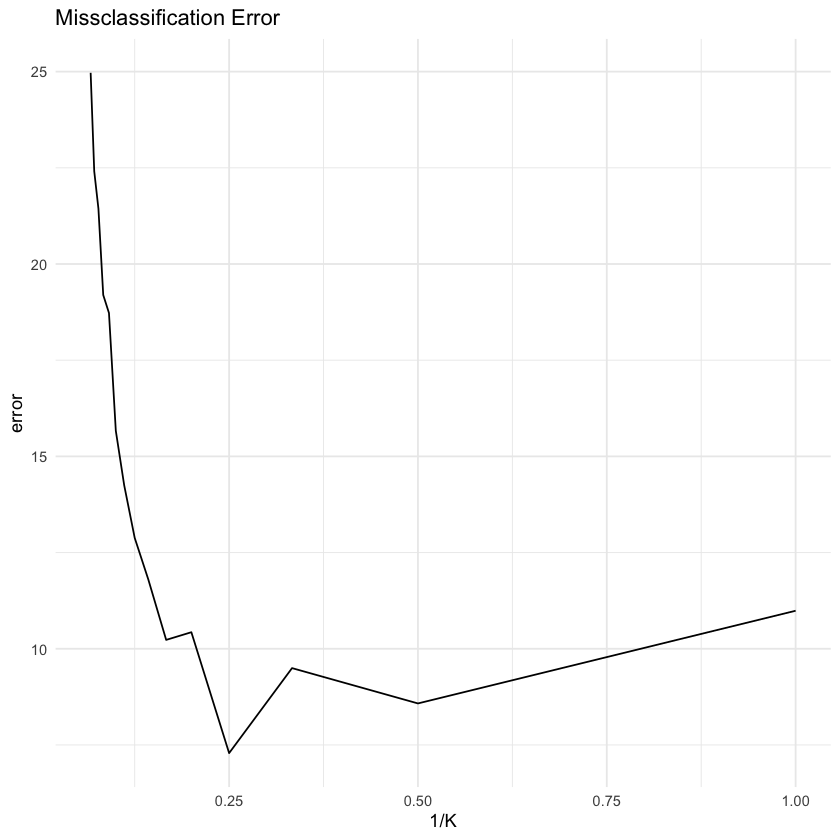

In [29]:
# creating a dataframe to store the k values and the avg error of each folds corresponding to the k value
miss.fold<-data.frame("K"=1:15,"error"=rep(0,15))

# for each k
for (k in 1:15){
    # storing an empty error number to store the total error for each fold of each k 
    total_each_fold <- 0
    # looping throught the errors for each folds
    for (i in cv(train.data,train.label,K=k,numFold=length(train.data))){
        # summing the total error for each fold
        total_each_fold<-total_each_fold+i
    }
    # average error (total by number of fold which the length of the data)
    miss.fold[k,"error"] <- (total_each_fold/length(train.data))
}

# plotting the error vs 1/K
ggplot(data=miss.fold, aes(x=1/K, y=error)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error")

2.II

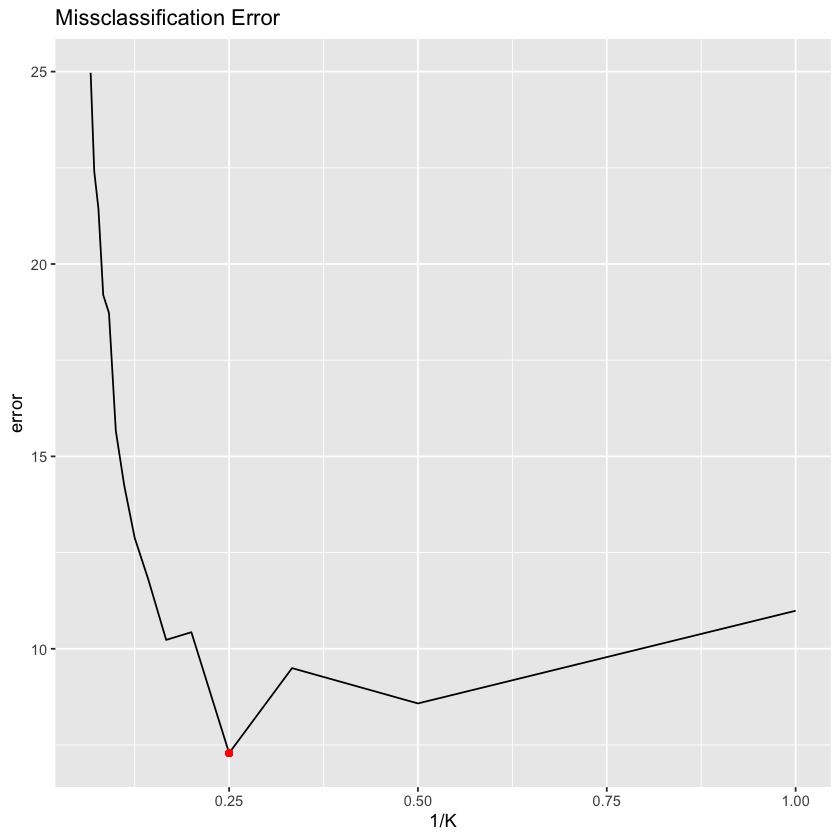

In [37]:
# plotting the poriginal plot with the optimum k value point
# finding the optimum k value
# by finding the lowest error point for test set
# it is used in the geom_point
ggplot(data=miss.fold, aes(x=1/K, y=error)) + geom_line() +
       geom_point(x=1/min_error_k,y=miss.fold[miss.fold$K==miss.fold[which.min(miss.fold$error),"K"],]$error,color="red")+
       ggtitle("Missclassification Error")

We can observe the minimum k value as 4 from the plot (1/0.25 = 4)